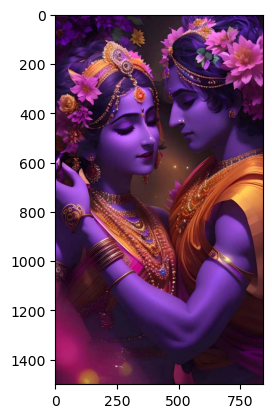

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("Radhe-Krishna.jpg")
img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img2)

C:\Users\Bhavya\AppData\Local\Temp\ipykernel_12132\1070828944.py:3: RuntimeWarning: divide by zero encountered in log
  log_trans=c*np.log(1+img)
C:\Users\Bhavya\AppData\Local\Temp\ipykernel_12132\1070828944.py:4: RuntimeWarning: invalid value encountered in cast
  log_trans=np.array(log_trans,dtype='uint8')


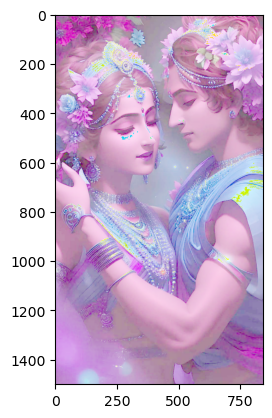

In [2]:
#LOG_TRANSFORMED
c=255/(np.log(1+np.max(img)))
log_trans=c*np.log(1+img)
log_trans=np.array(log_trans,dtype='uint8')
plt.imshow(log_trans)

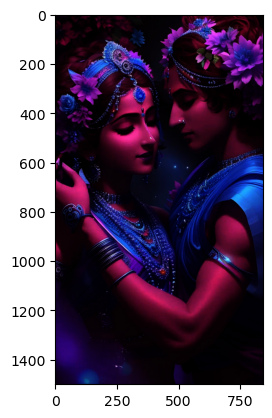

In [3]:
#GAMMA TRANSFORMED
gammaimg=np.array(255*(img/255)**2.1,dtype='uint8')
plt.imshow(gammaimg)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


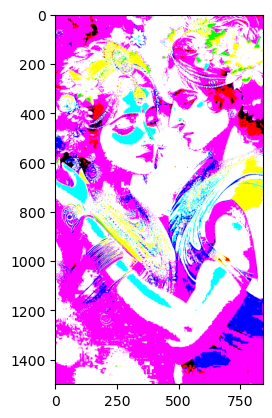

In [4]:
#CONTRAST STRETCHING
grey_img=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(grey_img)
def pixelVal(pix,r1,s1,r2,s2):
    if(0<=pix and pix<=r1):
        return (s1/r1)*pix
    elif(r1<=pix and pix<=r2):
        return ((s2-s1)/(r2-r1))*(pix-r1)+s1
    else:
        return ((255-s2)/255-r2)*(pix)-r2+s2
pixelVal_vec=np.vectorize(pixelVal)
contrast_stretched=pixelVal_vec(img,22,0,212,255)
plt.imshow(contrast_stretched)


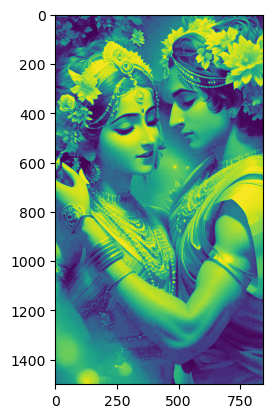

In [5]:
hist=cv2.equalizeHist(grey_img)
plt.imshow(hist)

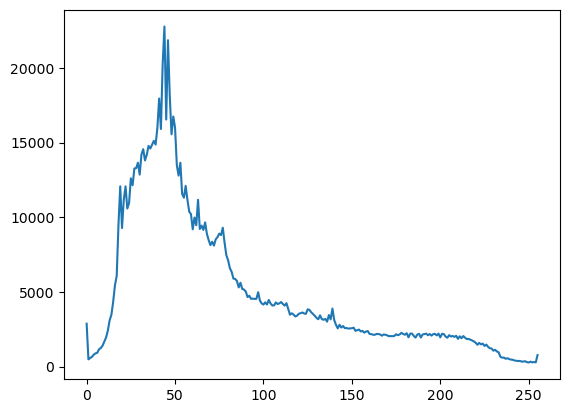

In [6]:
histr=cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

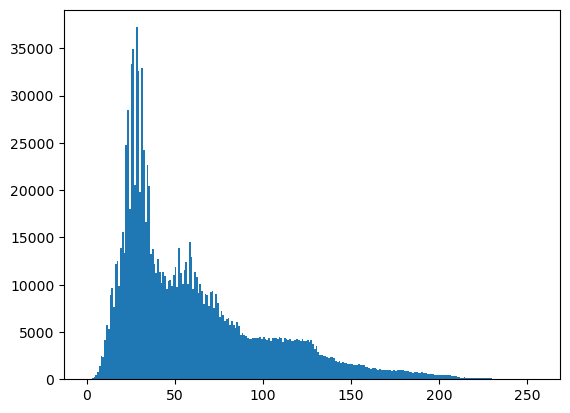

In [7]:
b,g,r=cv2.split(img2)
zeros = np.zeros(img.shape[:2], dtype="uint8")
cv2.imshow("Red", cv2.merge([zeros, zeros, r]))
cv2.imshow("Green", cv2.merge([zeros, g, zeros]))
cv2.imshow("Blue", cv2.merge([b, zeros, zeros]))
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.hist(grey_img.ravel(),256,[0,256])
plt.show()

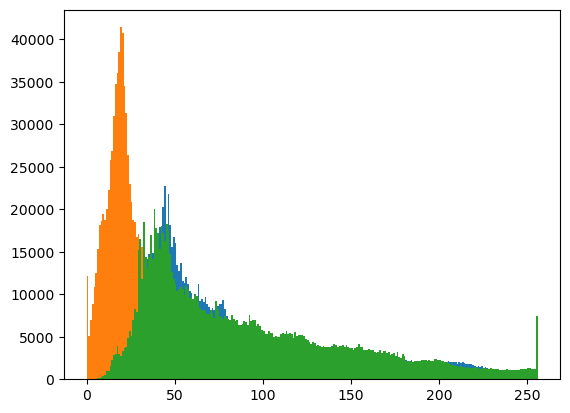

In [8]:
plt.hist(r.ravel(),256,[0,256])
plt.hist(g.ravel(),256,[0,256])
plt.hist(b.ravel(),256,[0,256])
plt.show()

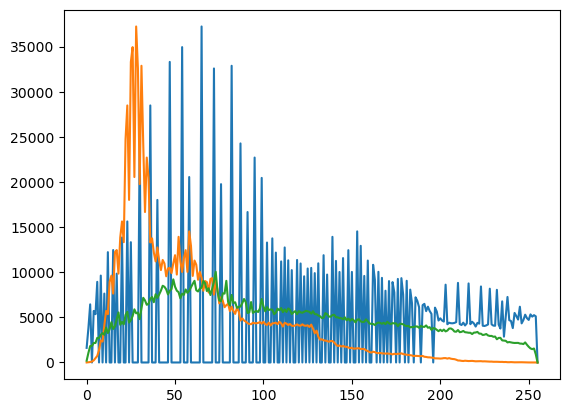

In [9]:
#calchist
hist_eq=cv2.equalizeHist(grey_img)
clahe = cv2.createCLAHE(clipLimit=5.0)
claheimg = clahe.apply(grey_img)
cv2.imshow('ori',grey_img)
cv2.imshow('equalized',hist_eq)
histgeq=cv2.calcHist([hist_eq],[0],None,[256],[0,255])
plt.plot(histgeq)
histg=cv2.calcHist([grey_img],[0],None,[256],[0,255])
plt.plot(histg)
histclahe=cv2.calcHist([claheimg],[0],None,[256],[0,255])
plt.plot(histclahe)
plt.show()
cv2.imshow('ori',grey_img)
cv2.imshow('equalized',hist_eq)
cv2.imshow('clahe img',claheimg)

cv2.waitKey(0)
cv2.destroyAllWindows()

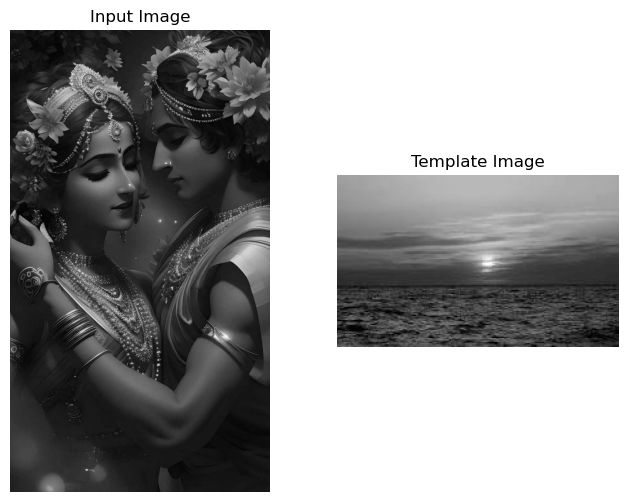

In [10]:
#histogram matching
from skimage.io import imread                         # load the image
from skimage.exposure import cumulative_distribution  # calculate the cumulative pixel value
import numpy as np                                    # reshape the image
import matplotlib.pyplot as plt 
image = (imread('Radhe-Krishna.jpg', as_gray=True)*255).astype(np.uint8)
imageTemplate = (imread('sunset.jpg', as_gray=True)*255).astype(np.uint8)
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.title('Input Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Template Image')
plt.imshow(imageTemplate, cmap='gray')
plt.axis('off')
plt.show()

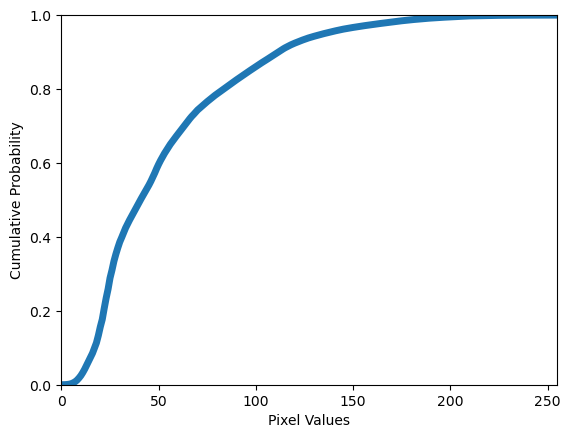

In [11]:
# compute the cumulative distribution of input image
cdfImageInput, binsImageInput = cumulative_distribution(image)

plt.plot(binsImageInput, cdfImageInput, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.show()

In [12]:
# check the first and last bins and probability
print(f"First bins: {binsImageInput[0]}, Cumulative Probability: {cdfImageInput[0]:.5f}")
print(f"Last bins: {binsImageInput[-1]}, CUmulative Probability: {cdfImageInput[0]:.5f}")

First bins: 0, Cumulative Probability: 0.00002
Last bins: 254, CUmulative Probability: 0.00002


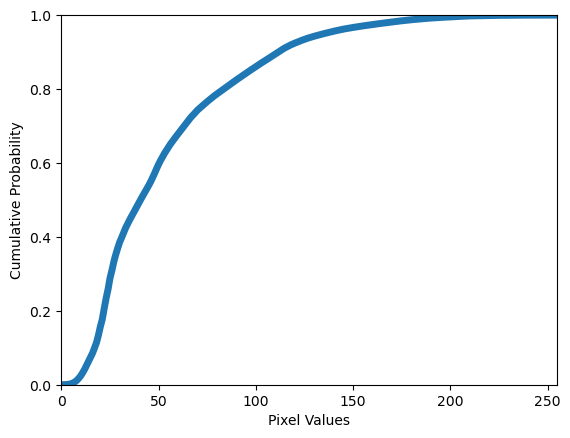

In [13]:
# pad the begining and ending pixel values
cdfImageInput = np.insert(cdfImageInput, 0, [0]*binsImageInput[0]) # fill 0 in index 0 - 17
cdfImageInput = np.append(cdfImageInput, [1]*(255-binsImageInput[-1])) # fill 1 in index 247 - 255

plt.plot(cdfImageInput, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.show()

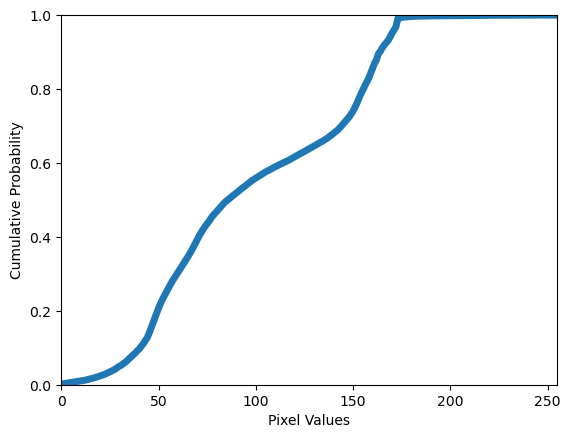

In [14]:
# compute the cumulative distribution of image template
cdfImageTemplate, binsImageTemplate = cumulative_distribution(imageTemplate)

cdfImageTemplate = np.insert(cdfImageTemplate, 0, [0]*binsImageTemplate[0])
cdfImageTemplate = np.append(cdfImageTemplate, [1]*(255-binsImageTemplate[-1]))

plt.plot(cdfImageTemplate, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.show()

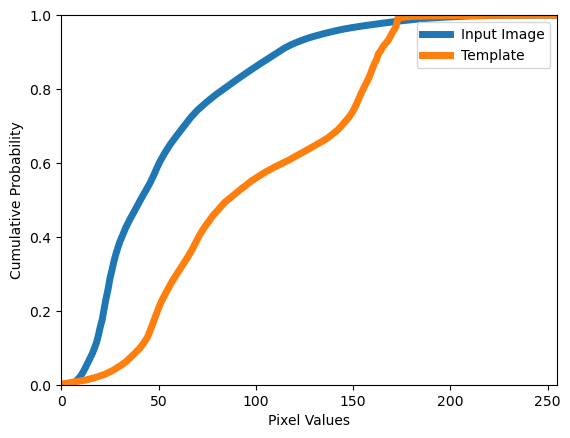

In [15]:
plt.plot(cdfImageInput, linewidth=5, label='Input Image')
plt.plot(cdfImageTemplate, linewidth=5, label='Template')
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

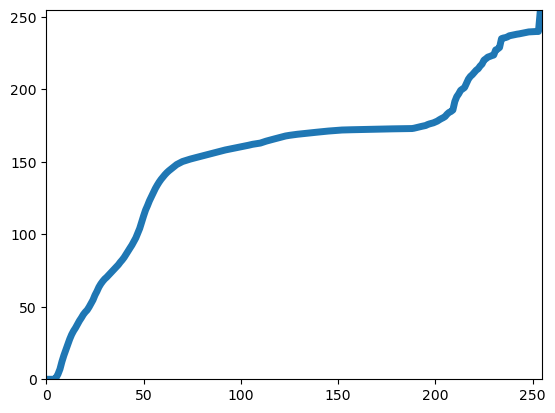

In [16]:
# Create an array of pixel values
pixels = np.arange(256)
new_pixels = np.interp(cdfImageInput, cdfImageTemplate, pixels)
plt.plot(new_pixels, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,255)
plt.show()

In [17]:
# Map and Reshape to 2D array
imageOut = (np.reshape(new_pixels[image.ravel()], image.shape)).astype(np.uint8)

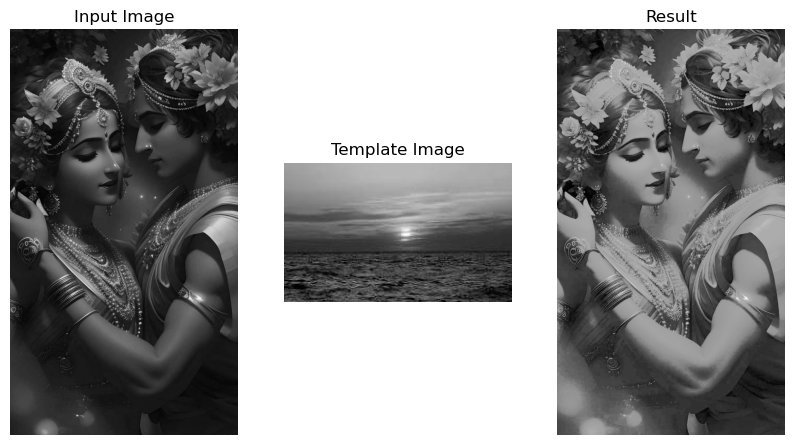

In [18]:
# Preview the result
plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
plt.title('Input Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Template Image')
plt.imshow(imageTemplate, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Result')
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()


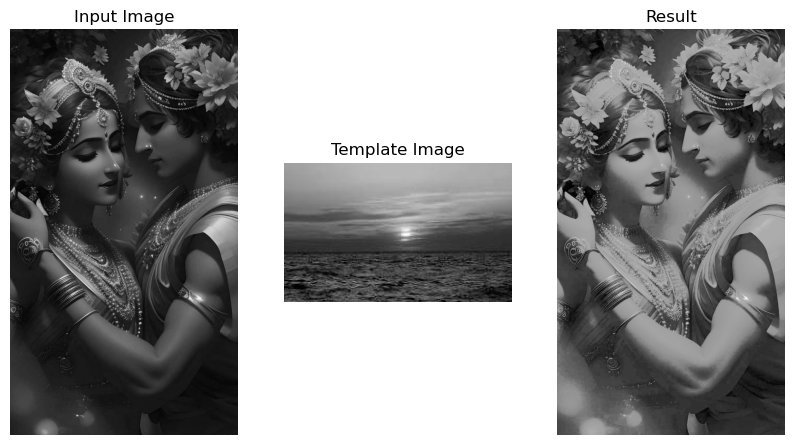

In [19]:
# get the CDF
def getCDF(image):
    cdf, bins = cumulative_distribution(image)
    cdf = np.insert(cdf, 0, [0]*bins[0])
    cdf = np.append(cdf, [1]*(255-bins[-1]))
    return cdf

# histogram matching
def histMatch(cdfInput, cdfTemplate, imageInput):
    pixelValues = np.arange(256)
    new_pixels = np.interp(cdfInput, cdfTemplate, pixels)
    imageMatch = (np.reshape(new_pixels[imageInput.ravel()], imageInput.shape)).astype(np.uint8)
    return imageMatch

# Preview the result
def plotResult(imInput, imTemplate, imResult):
    plt.figure(figsize=(10,7))
    plt.subplot(1,3,1)
    plt.title('Input Image')
    plt.imshow(imInput, cmap='gray')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.title('Template Image')
    plt.imshow(imTemplate, cmap='gray')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.title('Result')
    plt.imshow(imResult, cmap='gray')
    plt.axis('off')
    plt.show()
# read/load the input and template image
image = (imread('Radhe-Krishna.jpg', as_gray=True)*255).astype(np.uint8)
imageTemplate = (imread('sunset.jpg', as_gray=True)*255).astype(np.uint8)

# compute the CDF
cdfInput = getCDF(image)
cdfTemplate = getCDF(imageTemplate)
imageResult = histMatch(cdfInput, cdfTemplate, image)

# plot 
plotResult(image, imageTemplate, imageResult)

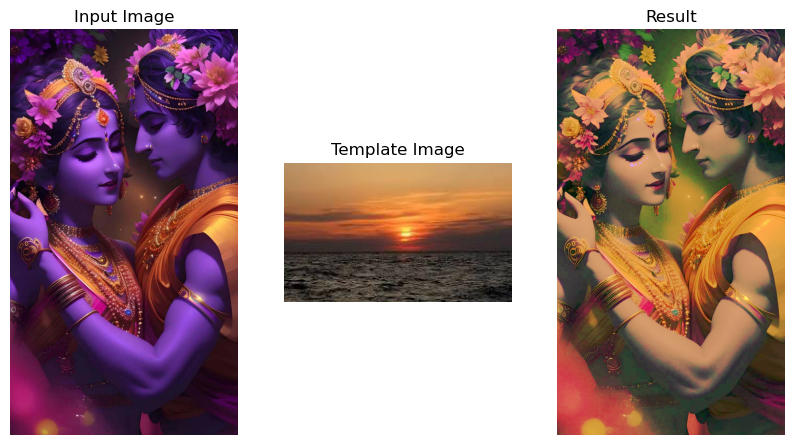

In [20]:
#HISTOGRAM MATCHING FOR COLOR IMAGE

# get the CDF
def getCDF(image):
    cdf, bins = cumulative_distribution(image)
    cdf = np.insert(cdf, 0, [0]*bins[0])
    cdf = np.append(cdf, [1]*(255-bins[-1]))
    return cdf

# histogram matching
def histMatch(cdfInput, cdfTemplate, imageInput):
    pixelValues = np.arange(256)
    new_pixels = np.interp(cdfInput, cdfTemplate, pixels)
    imageMatch = (np.reshape(new_pixels[imageInput.ravel()], imageInput.shape)).astype(np.uint8)
    return imageMatch

# Preview the result
def plotResult(imInput, imTemplate, imResult):
    plt.figure(figsize=(10,7))
    plt.subplot(1,3,1)
    plt.title('Input Image')
    plt.imshow(imInput)
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.title('Template Image')
    plt.imshow(imTemplate)
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.title('Result')
    plt.imshow(imResult)
    plt.axis('off')
    plt.show()
# read/load the input and template image
image = imread('Radhe-Krishna.jpg').astype(np.uint8)
imageTemplate = imread('sunset.jpg').astype(np.uint8)

# create a matrix for result
imageResult = np.zeros((image.shape)).astype(np.uint8)

# cdf and histogram
for channel in range(3):
    cdfInput = getCDF(image[:,:,channel])
    cdfTemplate = getCDF(imageTemplate[:,:,channel])
    imageResult[:,:,channel] = histMatch(cdfInput, cdfTemplate, image[:,:,channel])

# plot 
plotResult(image, imageTemplate, imageResult)